**Đặng Thành Nhân - MSSV:522H0006 - Lab10**

In [5]:
# Exercise01
import random

# (a)
x = []
for i in range(10000):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    x.append(die1 + die2)

# (b)
X = sorted(set(x))

# (c)
P = []
for i in X:
    P.append(x.count(i) / 10000)

# (d)
n = len(x)
EX = 0
for i, xi in enumerate(X):
    EX += xi * P[i]

EX2 = 0
for i, xi in enumerate(X):
    EX2 += (xi**2) * P[i]

VarX = EX2 - EX**2

StdX = VarX**0.5

print(f'Expectation: {EX:.3f}')
print(f'Variance: {VarX:.3f}')
print(f'Standard deviation: {StdX:.3f}')

Expectation: 7.034
Variance: 5.823
Standard deviation: 2.413


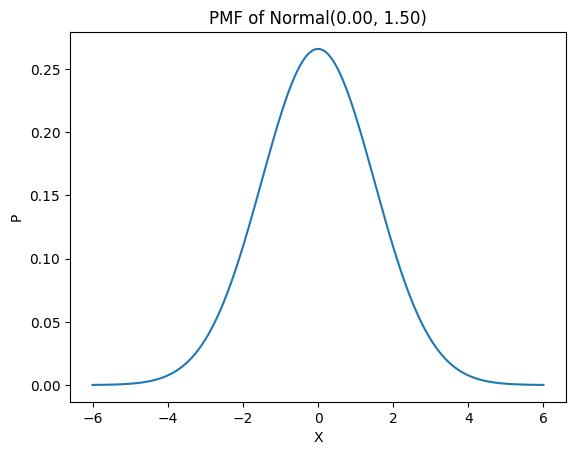

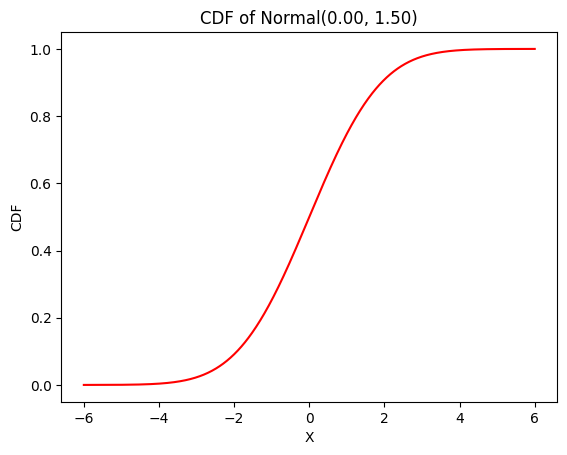

P(2 < X < 7) = 0.440


In [9]:
# Exercise02
from scipy.stats import norm
import matplotlib.pyplot as plt

def generator_data(a, b, size):
  n = (b - a) / (size-1)
  result = []
  s = a;
  while s < b:
    result.append(s)
    s = s + n;
  if len(result) < size:
      result.append(b)
  return result

def pmf_normal(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)
def cdf_normal(x, mu, sigma):
    return norm.cdf(x, loc=mu, scale=sigma)

# (a)
def plot_pmf_normal(mu, sigma):
  X = generator_data(mu - 4*sigma, mu + 4*sigma, 1000)
  P_normal = [pmf_normal(x, mu, sigma) for x in X]
  plt.plot(X,  P_normal, '-')
  plt.title('PMF of Normal(%.2f, %.2f)' %(mu, sigma))
  plt.xlabel('X')
  plt.ylabel('P')
  plt.show()
plot_pmf_normal(0, 1.5)

# (b)
def plot_cdf_normal(mu, sigma):
    X = generator_data(mu - 4*sigma, mu + 4*sigma, 1000)
    CDF_normal = [cdf_normal(x, mu, sigma) for x in X]
    plt.plot(X, CDF_normal, '-', color = 'red')
    plt.title('CDF of Normal(%.2f, %.2f)' % (mu, sigma))
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.show()
plot_cdf_normal(0, 1.5)

# (c)
mu = 3
sigma = 4
p = cdf_normal(7, mu, sigma) - cdf_normal(2, mu, sigma)
print(f'P(2 < X < 7) = {p:.3f}')

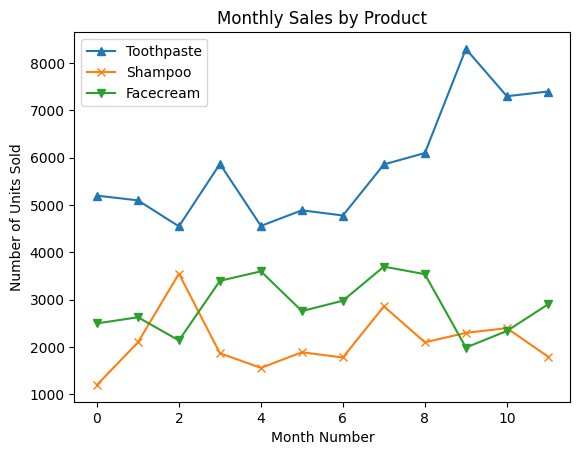

In [22]:
 #Exercise03
import csv
import matplotlib.pyplot as plt
import pandas as pd
# from google.colab import files
# uploaded = files.upload()

data = pd.read_csv('company-sales_data.csv')

toothpaste = data["toothpaste"]
shampoo = data["shampoo"]
facecream = data["facecream"]

plt.plot(toothpaste, label="Toothpaste", marker="^")
plt.plot(shampoo, label="Shampoo", marker="x")
plt.plot(facecream, label="Facecream", marker="v")

plt.xlabel("Month Number")
plt.ylabel("Number of Units Sold")
plt.title("Monthly Sales by Product")
plt.legend()

plt.show()

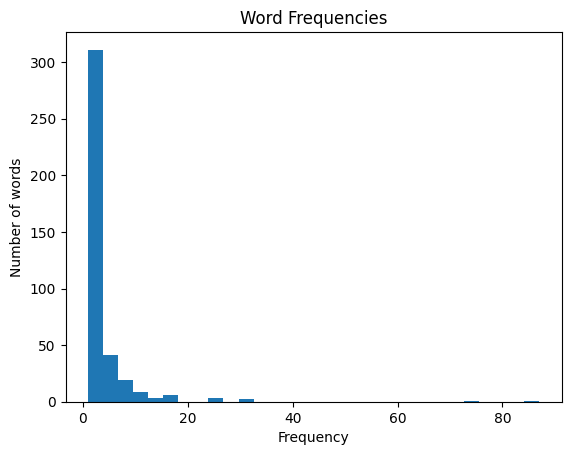

Top 10 most frequent words:
the: 87
and: 75
a: 32
to: 32
she: 26
you: 25
her: 24
it: 18
of: 17
in: 17


In [34]:
#Exercise04
import re
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

# Read in text file
with open('Text.txt') as f:
    text = f.read()

# Preprocess text
text = text.lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
words = text.split()

# Calculate frequencies
freqs = {}
for word in words:
    if word in freqs:
        freqs[word] += 1
    else:
        freqs[word] = 1

# Plot histogram
plt.hist(list(freqs.values()), bins=30)
plt.xlabel('Frequency')
plt.ylabel('Number of words')
plt.title('Word Frequencies')
plt.show()

# Find most frequent words
most_freq = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]

print('Top 10 most frequent words:')
for word, freq in most_freq:
    print(f'{word}: {freq}')